In [1]:
# loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
# loading dataset
vidgame_sales = pd.read_csv(r'D:\Purity\Books\MLData\vgsales.csv')
print(vidgame_sales.shape)
vidgame_sales.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vidgame_sales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
#creating list of columns
cat_cols = [ 'Name', 'Platform', 'Genre', 'Publisher']#categorical
num_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']#numerical

In [5]:
# checking for null values
vidgame_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#droping year column
vidgame_sales.drop(['Year'], axis = 1, inplace=True)
#filling missing values in publisher with mode
vidgame_sales['Publisher'] = vidgame_sales['Publisher'].fillna(vidgame_sales['Publisher'].mode()[0])

In [7]:
# checking for null values
vidgame_sales.isna().sum()

Rank            0
Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
# value_counts for categorical columns
for col in cat_cols:
    print(col)
    print(vidgame_sales[col].value_counts())
    print('\n')

Name
Need for Speed: Most Wanted             12
Madden NFL 07                            9
FIFA 14                                  9
LEGO Marvel Super Heroes                 9
Ratatouille                              9
                                        ..
Magi: Aratanaru Sekai                    1
Goemon's Great Adventure                 1
Super Mario Advance                      1
Fatal Fury: Battle Archives Volume 2     1
Brothers Conflict: Passion Pink          1
Name: Name, Length: 11493, dtype: int64


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


Genre
Action          3316
Sports    

In [9]:
vidgame_sales.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


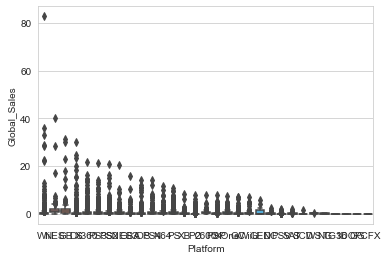

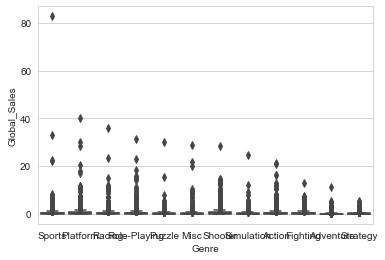

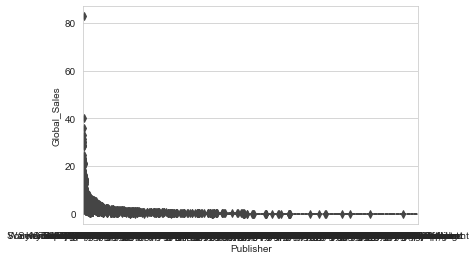

In [10]:
# boxplot for the  categorical columns vs global sales
def plot_box(vidgame_sales, col, col_y = 'Global_Sales'):
    sns.set_style("whitegrid")
    sns.boxplot(x=col, y=col_y, data=vidgame_sales)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
for col in ['Platform', 'Genre', 'Publisher']:
    plot_box(vidgame_sales, col) 

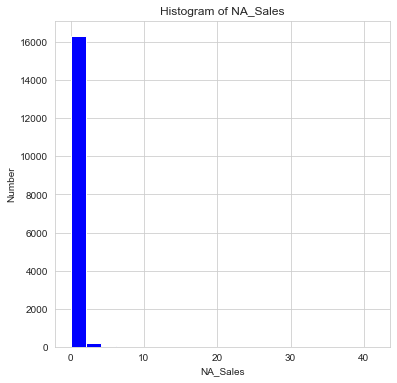

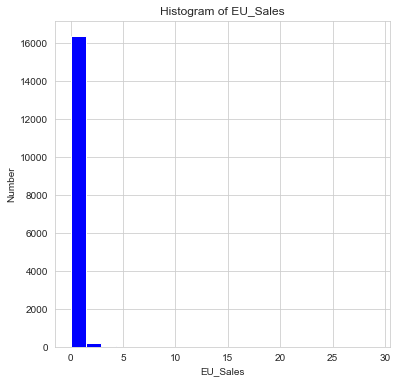

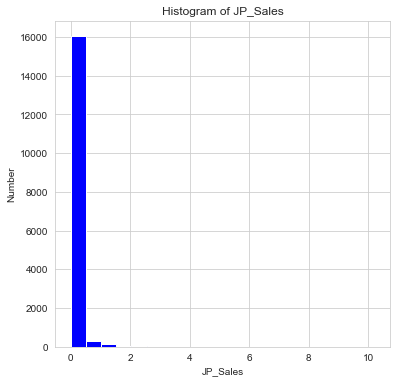

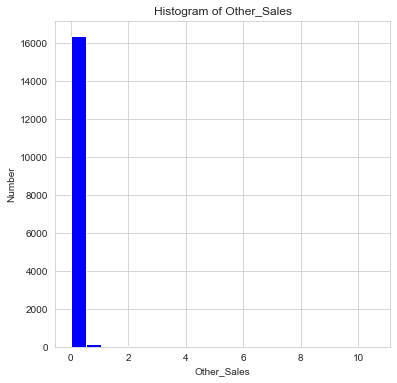

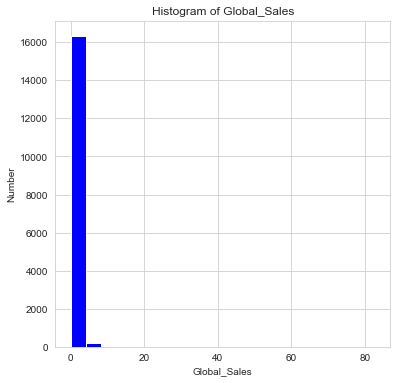

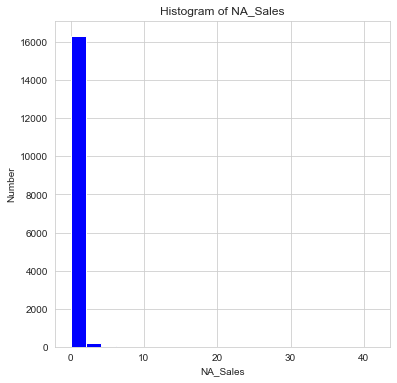

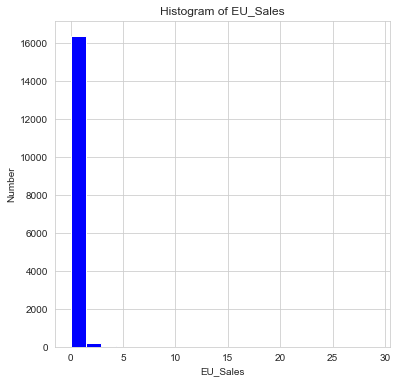

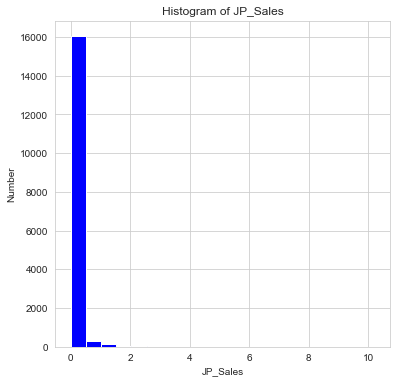

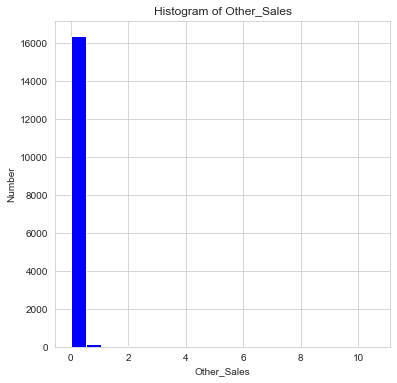

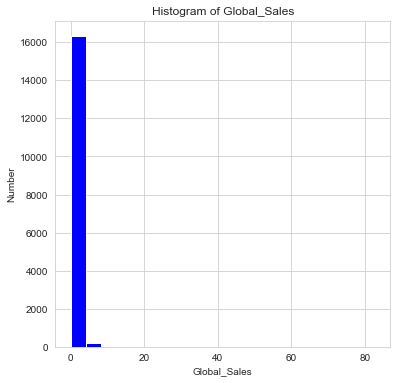

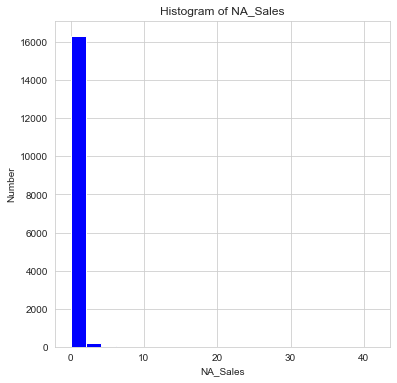

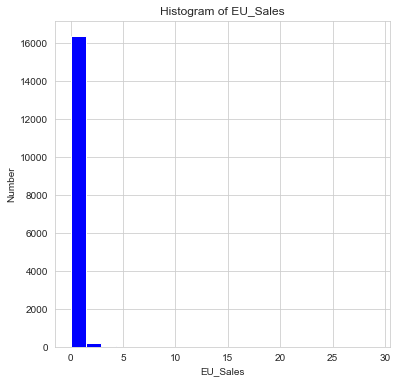

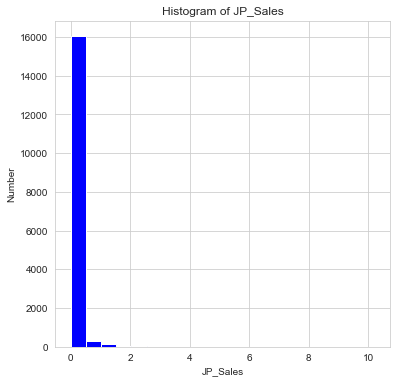

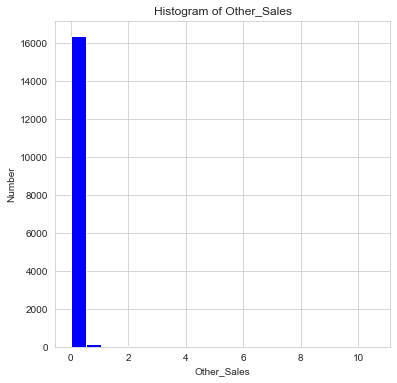

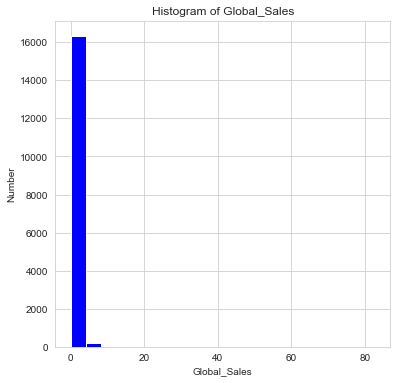

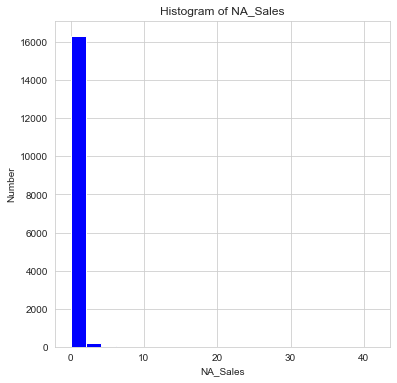

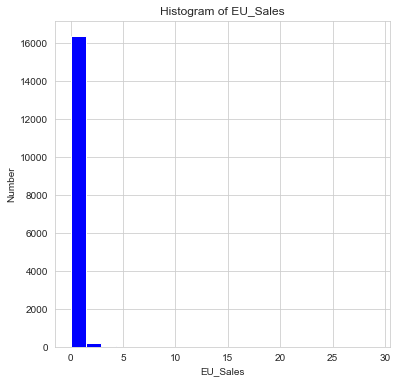

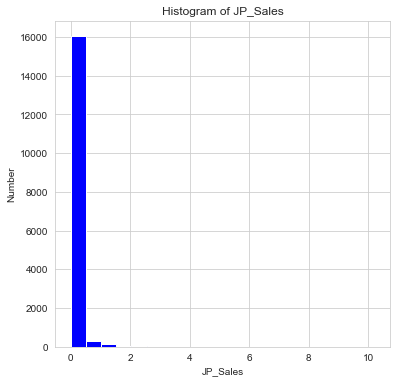

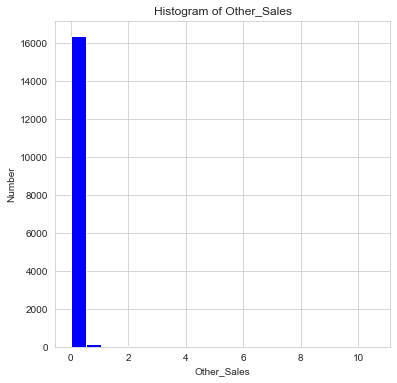

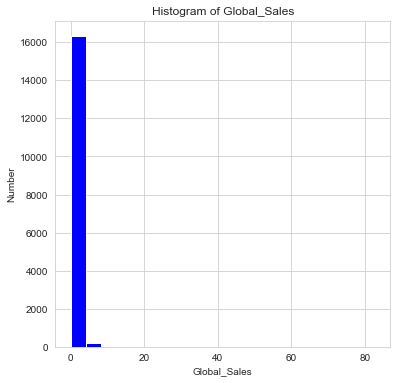

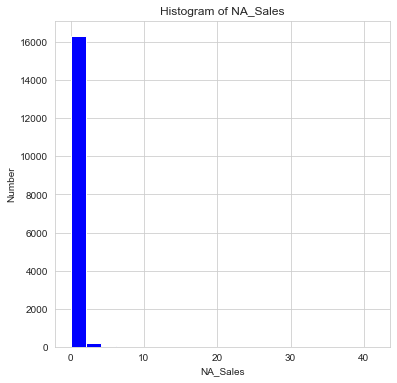

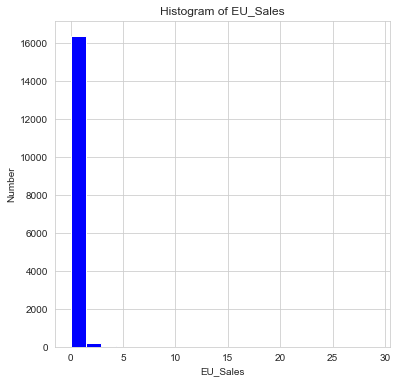

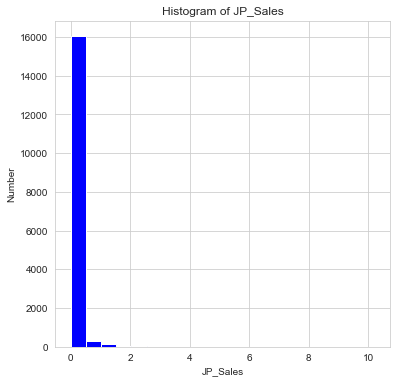

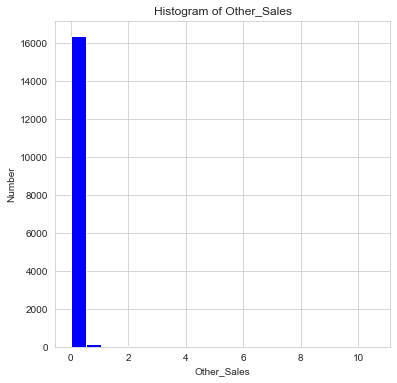

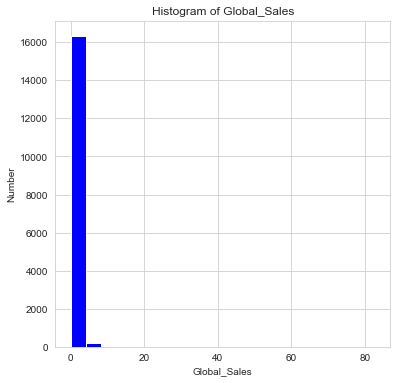

In [11]:
#function for plotting a histogram for numerical columns
def plot_histogram(cols, df=vidgame_sales, bins=20):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
for col in num_cols:
    plot_histogram(num_cols)

In [12]:
# transforming global sales by log
vidgame_sales['log_global_sales'] = np.log(vidgame_sales['Global_Sales'])

In [13]:
# creating a correlation matrix
# get correlations
corr = vidgame_sales[num_cols].corr()
corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


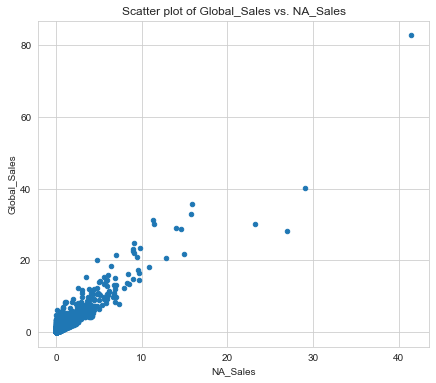

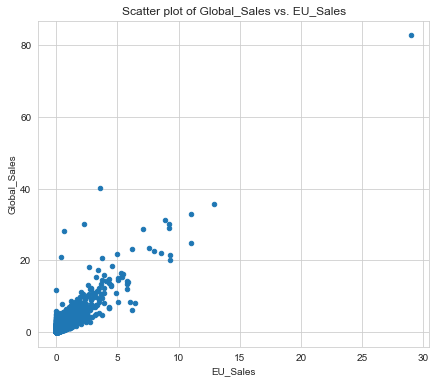

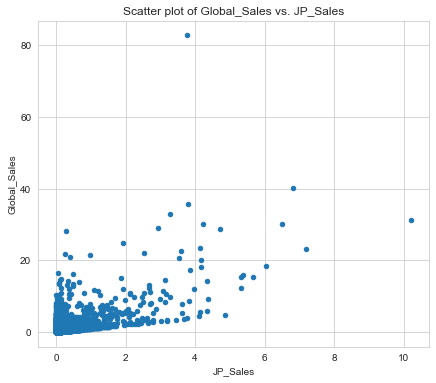

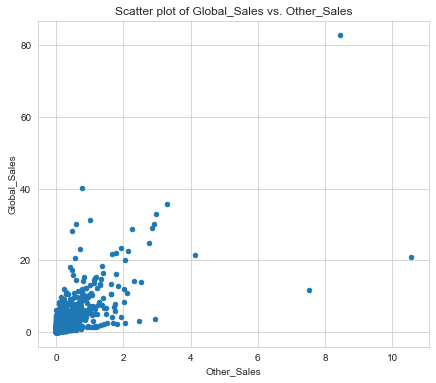

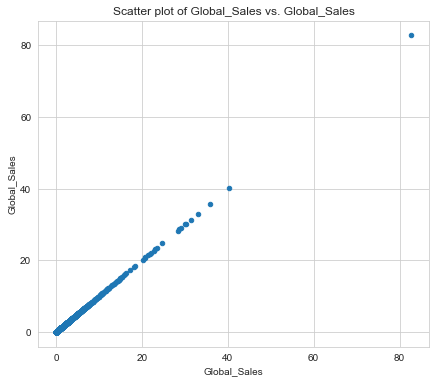

In [14]:
# scatterplots for numeric columns
def plot_scatter(vidgame_sales, cols, col_y):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        vidgame_sales.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()
plot_scatter(vidgame_sales, num_cols, 'Global_Sales')  

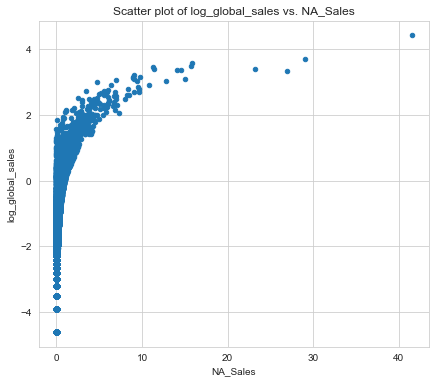

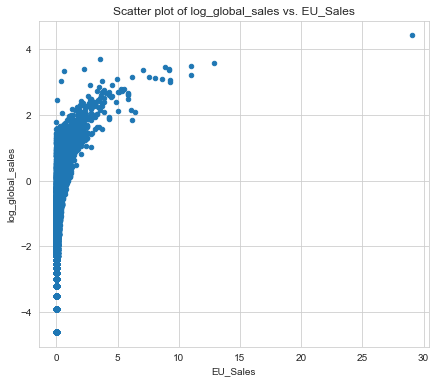

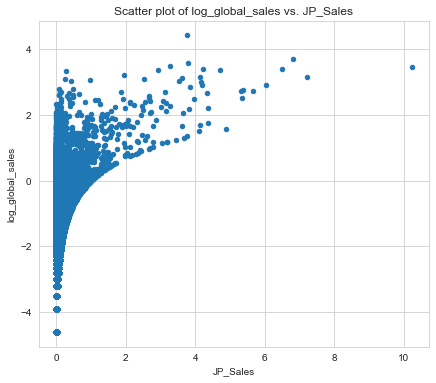

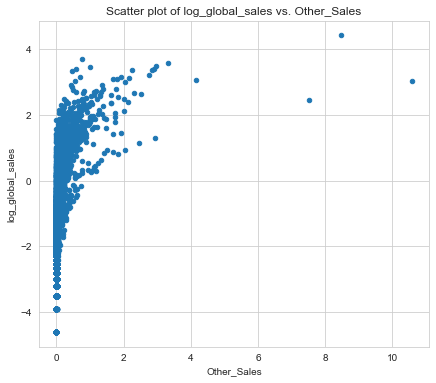

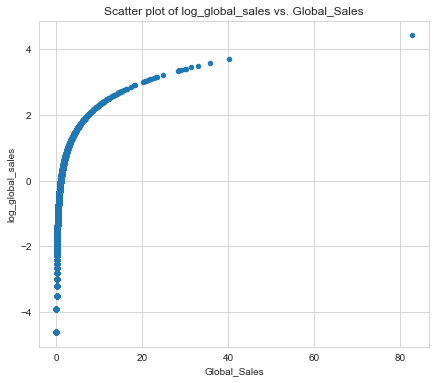

In [15]:
plot_scatter(vidgame_sales, num_cols, 'log_global_sales')

In [16]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

In [17]:
# turning features and label to numpy array
X = np.array(vidgame_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
y = np.array(vidgame_sales['Global_Sales'])

In [18]:
# splitting data to form train & test set
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 100)

In [19]:
# constructing linear model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [20]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[0.99996957 1.00001302 1.00000049 1.00001096]


In [21]:
# testing model
y_score = lin_mod.predict(X_test) 
y_score
# printing scores
print(y_score[:10])

[0.27999752 0.04999848 0.15999685 0.69998553 0.01       0.12999735
 0.27999231 0.02999909 1.4799994  0.05999861]


In [22]:
# evaluating model
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
 
print_metrics(y_test, y_score, 4) 

Mean Square Error      = 2.646551059426019e-05
Root Mean Square Error = 0.0051444640725988346
Mean Absolute Error    = 0.002642942121930323
Median Absolute Error  = 3.3251292028135815e-06
R^2                    = 0.9999885223194609
Adjusted R^2           = 0.9999885153996374


C:\Users\JORN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


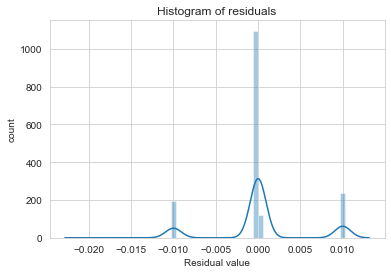

In [23]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

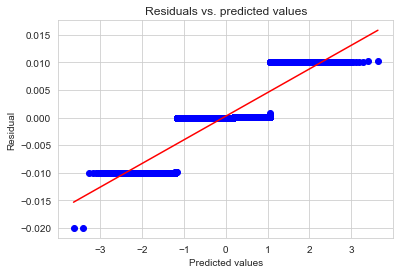

In [24]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)  

C:\Users\JORN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


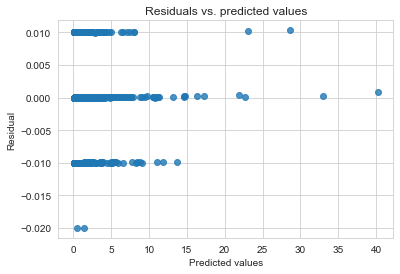

In [25]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 